In [1]:
from functools import partial
import pickle as pkl
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

In [2]:
fname = os.environ["PROJECT_DIR"] + "/resources/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs = df_alignment(df_obs, is_obs=True)

/home/peisenha/external-storage/ownCloud/office/projects/structExpectations/development/library/dev_library.py:61: FutureWarning: inplace is deprecated and will be removed in a future version.
  df_int.index.set_levels(range(num_persons), level="Identifier", inplace=True)


In [3]:
os.chdir("/home/peisenha/structExpectations/development/estimations/basecamp")

In [4]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value     upper    lower  fixed
category      name                                                         
benefits_base                          200.000000  1000.000  100.000   True
const_wage_eq gamma_0s1                  1.946973     3.700    1.380  False
              gamma_0s2                  2.122471     3.700    1.380  False
              gamma_0s3                  2.127348     3.700    1.380  False
delta                                    0.980000     0.990    0.900   True
exp_accm      g_s1                       0.096268     0.500    0.001  False
              g_s2                       0.199460     0.500    0.001  False
              g_s3                       0.301422     0.500    0.001  False
exp_deprec    delta_s1                   0.020000     0.200    0.001   True
              delta_s2                   0.020000     0.200    0.001   True
              delta_s3                   0.020000     0.200    0.001   True
exp_returns   gamma_1s1                  0.169869     0.500    0.001  False
              gamma_1s2                  0.188104     0.500    0.001  False
              gamma_1s3                  0.347085     0.500    0.001  False
fval          fval                    2366.446813       NaN      NaN   True
hetrg_unobs   theta_f1                  -0.998686    -0.100   -1.000  False
              theta_p1                  -0.655901    -0.100   -1.000  False
mu                                      -0.560000    -0.990   -0.010   True
sd_wage_shock sigma_1                    0.351430     1.000    0.001  False
              sigma_2                    0.392801     1.000    0.001  False
shares        share_1                    0.660619     0.900    0.100   True
disutil_work  no_kids_f_educ_low         0.844228     2.000    0.001  False
              no_kids_f_educ_middle      0.547738     2.000    0.001  False
              no_kids_f_educ_high        0.358222     2.000    0.001  False
              yes_kids_f_educ_low        1.449773     2.000    0.001  False
              yes_kids_f_educ_middle     1.337311     2.000    0.001  False
              yes_kids_f_educ_high       1.898027     2.000    0.001  False
              child_02_f                 0.106986     0.200    0.001  False
              child_35_f                 0.009398     0.200    0.001  False
              child_610_f                0.002989     0.200    0.001  False
              no_kids_p_educ_low        -0.577553    -0.001   -1.500  False
              no_kids_p_educ_middle     -0.485823    -0.001   -1.500  False
              no_kids_p_educ_high       -0.410381    -0.001   -1.500  False
              yes_kids_p_educ_low       -0.365316    -0.001   -1.500  False
              yes_kids_p_educ_middle    -0.426357    -0.001   -1.500  False
              yes_kids_p_educ_high      -0.771660    -0.001   -1.500  False
              child_02_p                -0.256770    -0.001   -1.500  False
              child_35_p                -0.361214    -0.001   -1.500  False
              child_610_p               -0.447324    -0.001   -1.500  False

In [5]:
df_sim_start = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_start = df_alignment(df_sim_start)
df_sim_start.to_pickle("df-sim-start.pkl")

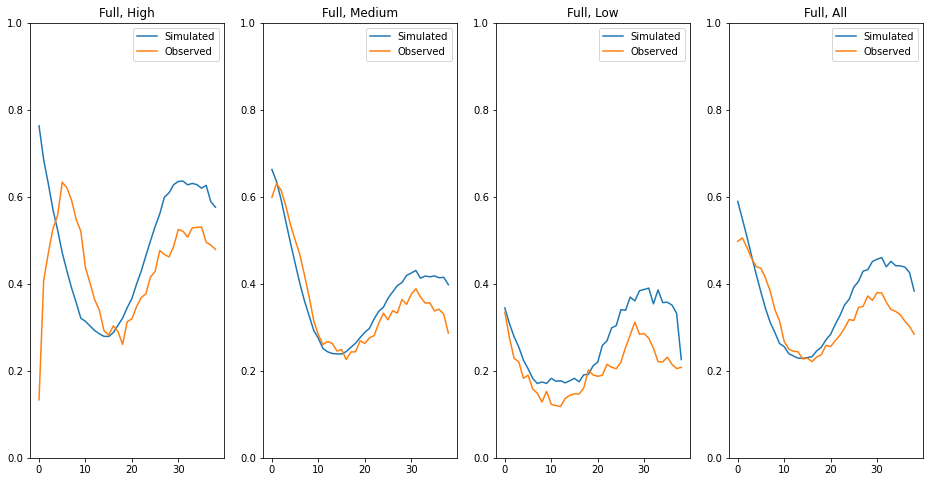

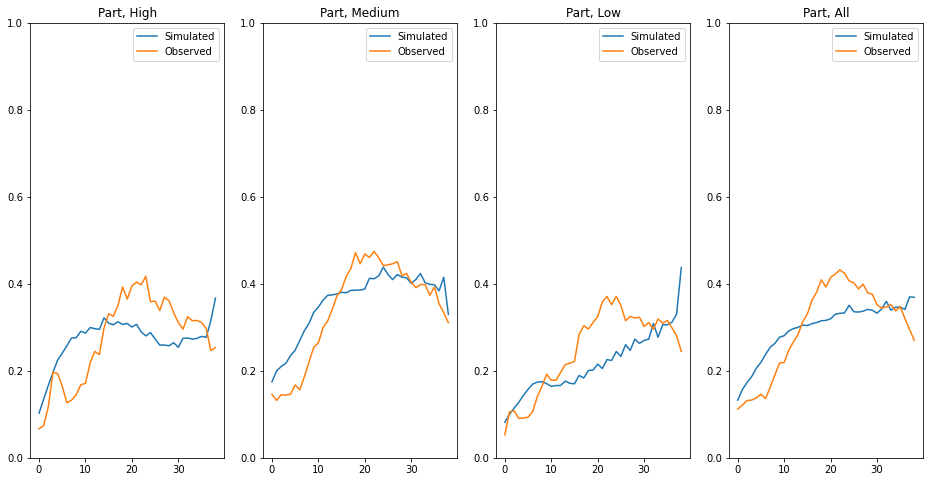

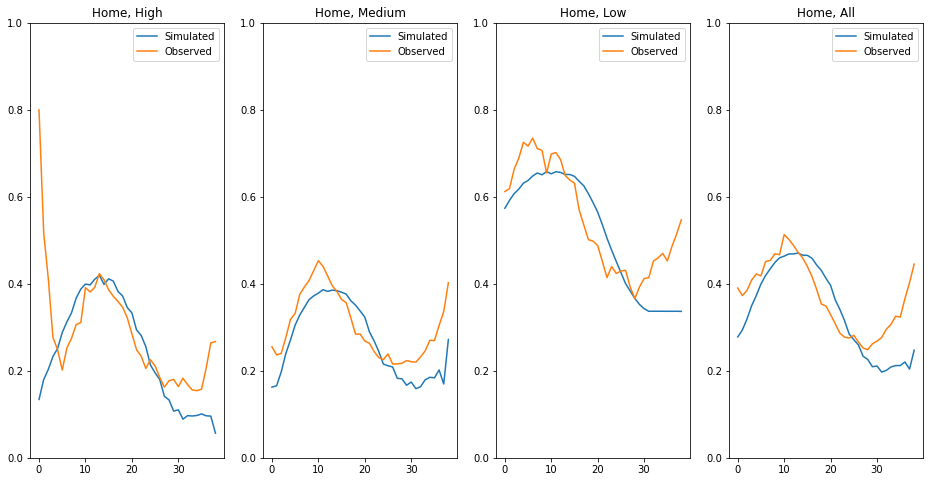

In [6]:
plot_basics_choices(df_sim=df_sim_start, df_obs=df_obs)

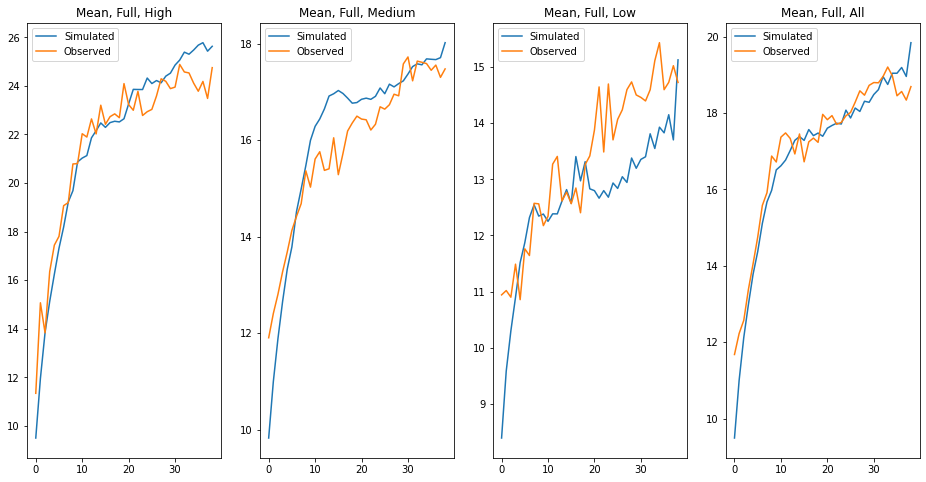

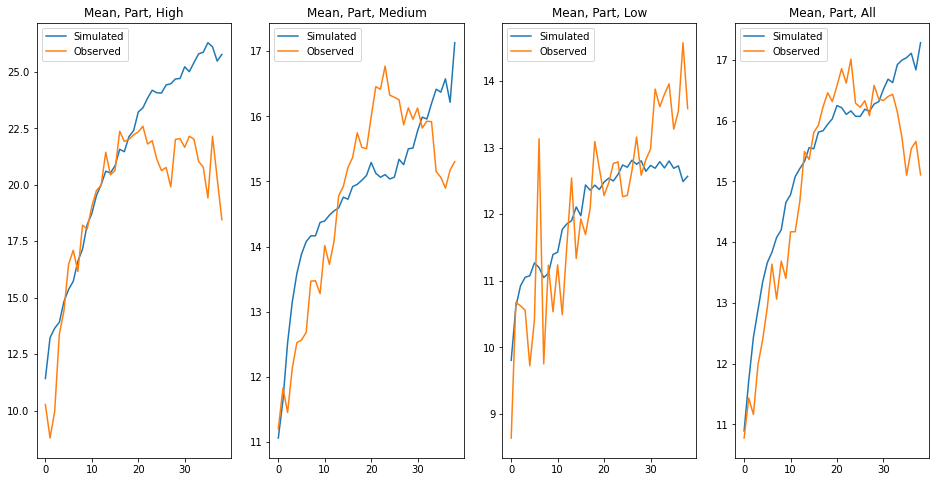

In [7]:
plot_basics_wages(df_sim=df_sim_start, df_obs=df_obs)